**Number Plate detection using openCV and Machine learning**

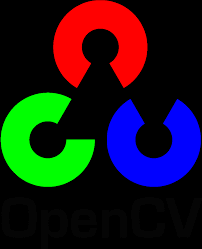

Self Project  :
Name : G.U.V.V. Akhil


Install required packages


In [1]:
!pip install easyocr
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=4835336040367449336ac9234ae1cdac13edd46cfaac506513bb35c15e830ffb
  Stored in directory: c:\users\akhil\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


Packages used:
<ul>
<li>Matplotlib</li>
<li>numpy</li>
<li>imutils</li>
<li>easyocr</li>
</ul>

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr




**Read an image and convert it into Grayscale and blur image.**


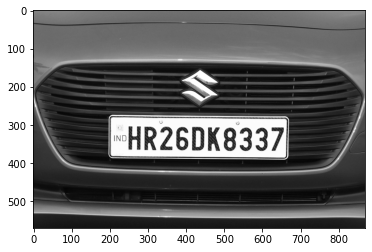

In [11]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**Apply filter and find edges for localization**

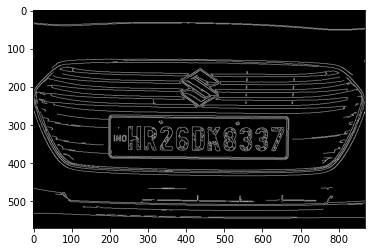

In [12]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

**Find Contours and Apply Mask**

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

**Find co-ordinates of number plate.**

In [14]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

**Print number plate co-ordinates.**

In [15]:
location

array([[[198, 282]],

       [[663, 278]],

       [[669, 381]],

       [[206, 387]]], dtype=int32)

In [16]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

**Plot colour image of number plate. **

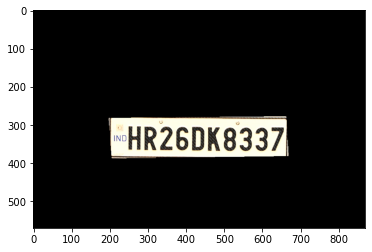

In [17]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [18]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

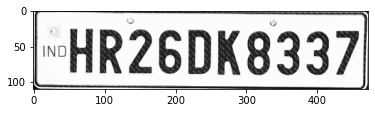

In [19]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

**Use Easy OCR To Read Text in Number plate**

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

C:\Users\akhil\anaconda3\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[8, 44], [54, 44], [54, 70], [8, 70]], 'INDI', 0.49826928973197937),
 ([[41, 11], [470, 11], [470, 109], [41, 109]],
  'HRZGDK8337|',
  0.40994240598553133)]

**Render Result**

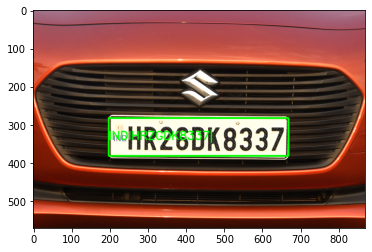

In [21]:
text = result[0][-2]
if len(result) == 2:
   text= result[0][-2]+ result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [22]:
text

'INDIHRZGDK8337|'